In [1]:
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd

from tqdm import tqdm

import plotly.express as px
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "iframe"

# Гео-данные станций

In [2]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [3]:
posts_df = pd.read_csv('../data/Датасет_04/02_координаты_станций.csv', sep=';', names=['post_name', 'latitude', 'longitude'])
posts = gpd.GeoDataFrame(
                posts_df, geometry=gpd.points_from_xy(posts_df.longitude, posts_df.latitude))

In [4]:
posts

,post_name,latitude,longitude,geometry
0,Академика,55.658163,37.471434,POINT (37.47143 55.65816)
1,Бутлерова,55.649412,37.535874,POINT (37.53587 55.64941)
2,Глебовская,55.811801,37.712490,POINT (37.71249 55.81180)
3,Коптевскии,55.833222,37.525158,POINT (37.52516 55.83322)
4,Марьино,55.652695,37.751502,POINT (37.75150 55.65270)
5,Останкино,55.821154,37.612592,POINT (37.61259 55.82115)
6,Пролетарскии,55.635129,37.658684,POINT (37.65868 55.63513)
7,Спиридоновка,55.759354,37.595584,POINT (37.59558 55.75935)
8,Туристская,55.856324,37.426628,POINT (37.42663 55.85632)
9,Шаболовка,55.715698,37.605238,POINT (37.60524 55.71570)


In [5]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [6]:
ao = gpd.read_file('../data/geo/ao.geojson')
mo = gpd.read_file('../data/geo/mo.geojson')

In [7]:
ao.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
mo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
import plotly.express as px

fig = px.scatter_mapbox(posts, lat="latitude", lon="longitude", hover_name="post_name",
                        color_discrete_sequence=["red"], zoom=8, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

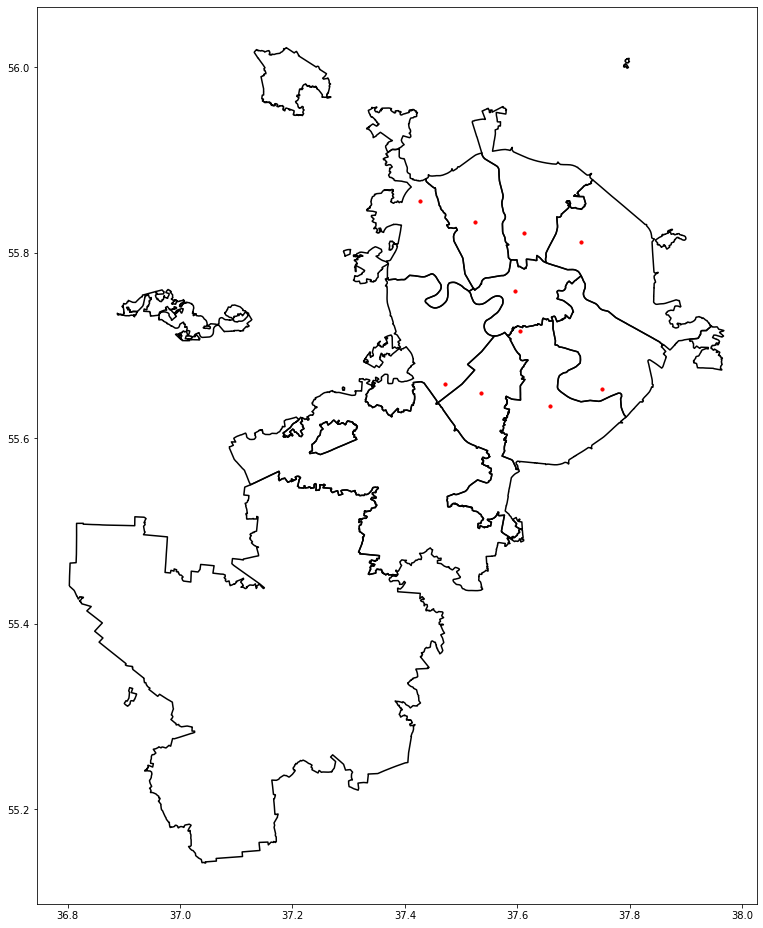

In [10]:
fig, ax = plt.subplots()

ao.boundary.plot(ax=ax, color='black', edgecolor='black')
#mo.boundary.plot(ax=ax, color='black', edgecolor='grey')
posts.plot(ax=ax, marker='o', color='red', markersize=10, aspect=1.65)
set_size(10,20)

plt.show()

# Измерения показаталей

In [11]:
datasets = {}
files = glob.glob('../data/Датасет_04/01_данные станций/[А-Я]*.xlsx')

for file in tqdm(files):
    name = re.findall(r'\w+', file)[4]
    data = pd.read_excel(file)
    data['Дата и время'] = pd.to_datetime(data['Дата и время'])
    data = data.sort_values(by='Дата и время')[:-2]
    datasets[name] = data

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


In [12]:
def plot_report(data):
    fig, axs = plt.subplots(5)

    axs[0].plot(data['Дата и время'], data['CO'])

    axs[1].plot(data['Дата и время'], data['NO2'])
    axs[1].plot(data['Дата и время'], data['NO'])
    axs[1].plot(data['Дата и время'], data['PM10'])

    axs[2].plot(data['Дата и время'], data['Осадки'])
    axs[2].plot(data['Дата и время'], data['-T-'])
    axs[2].plot(data['Дата и время'], data['| V |'])

    axs[3].plot(data['Дата и время'], data['Давление'])

    axs[4].plot(data['Дата и время'], data['Влажность'])



    axs[0].legend(['CO'])
    axs[1].legend(['NO2', 'NO', 'PM10'])
    axs[2].legend(['Осадки', '-T-', '| V |'])
    axs[3].legend(['Давление'])
    axs[4].legend(['Влажность'])

    set_size(25,15)

In [13]:
datasets.keys()

dict_keys(['Коптевскии', 'Глебовская', 'Останкино', 'Академика', 'Спиридоновка', 'Шаболовка', 'Туристская', 'Бутлерова', 'Пролетарскии', 'Марьино'])

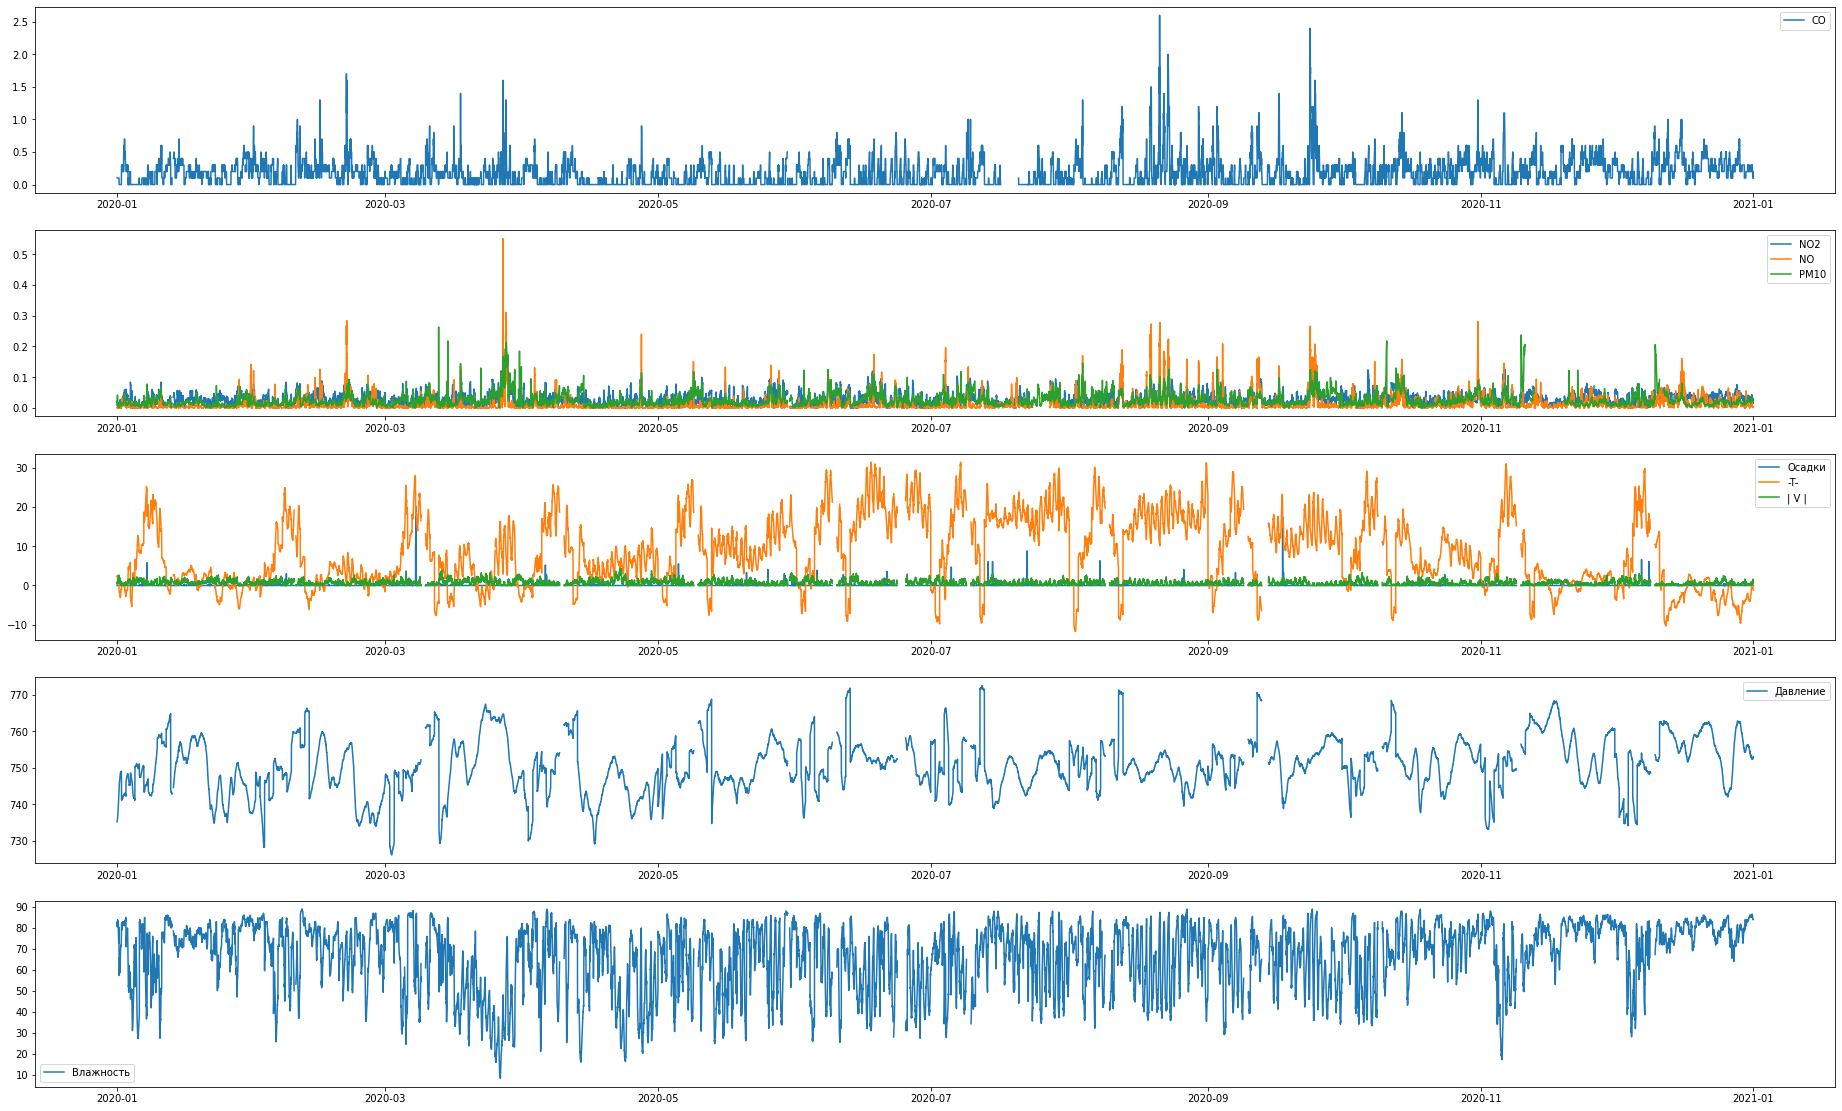

In [14]:
plot_report(datasets['Марьино'])

In [15]:
mask = (data['Дата и время'] >= '2020-09-23 19:00:00') & (data['Дата и время'] < '2020-09-24 00:00:00')

In [16]:
tmp_slice = pd.DataFrame(columns=['Дата и время', 'CO', 'NO2', 'NO', 'PM10', 'PM25', 'Unnamed: 6', '-T-',
       '| V |', '_V_', 'Давление', 'Влажность', 'Осадки', 'latitude',
       'longitude', 'post_name'])

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp/T/ipykernel_24431/116603732.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/9k/m33t6yss5wddtgq6qh_6llhw0000gp

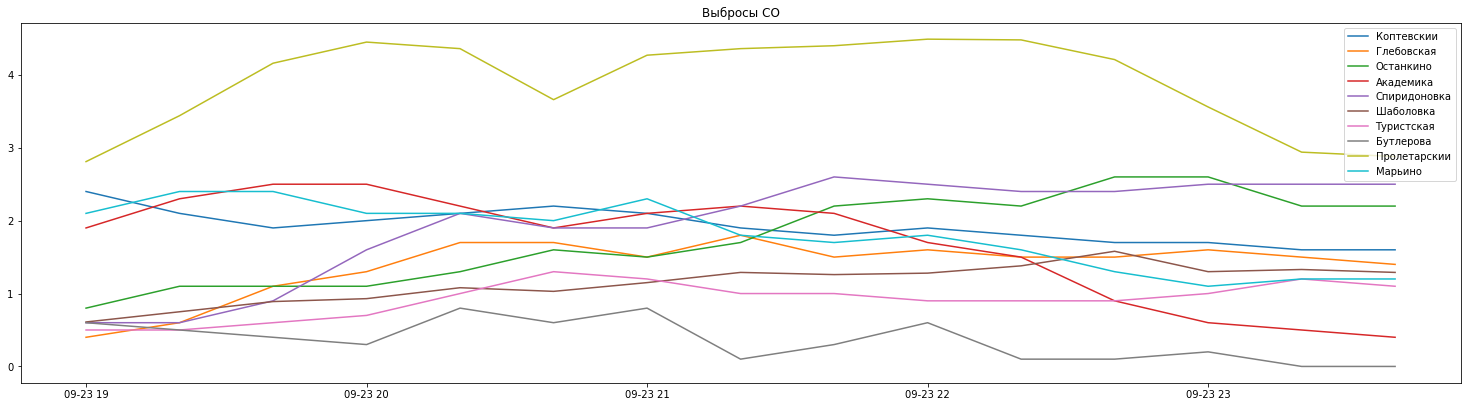

In [17]:
fig, axs = plt.subplots(1)

# keys = ['Бутлерова', 'Пролетарскии', 'Марьино', 'Туристская', 'Глебовская']
keys = datasets.keys()
for key in keys:
    
    axs.plot(datasets[key][mask==True]['Дата и время'], datasets[key][mask==True]['CO'])
    
    tmp = datasets[key][mask==True].copy()

    tmp2 = posts_df.query('post_name == @key')

    tmp['latitude'] = tmp2['latitude'].values[0]
    tmp['longitude'] = tmp2['longitude'].values[0]
    tmp['post_name'] = tmp2['post_name'].values[0]
    
    tmp_slice = pd.concat([tmp_slice, tmp])

axs.legend(keys)
axs.set_title('Выбросы CO')
set_size(20,5)

In [18]:
exmpl_data = tmp_slice[['Дата и время', 'CO', 'latitude', 'longitude', 'post_name']]

# Copernicus данные

In [19]:
from scipy.io import netcdf

In [20]:
file2read = netcdf.NetCDFFile('../data/copernicus/CO_mos.nc','r')

In [21]:
file2read.variables

{'longitude': <scipy.io.netcdf.netcdf_variable at 0x125480d30>,
 'latitude': <scipy.io.netcdf.netcdf_variable at 0x123933400>,
 'level': <scipy.io.netcdf.netcdf_variable at 0x1242cae80>,
 'time': <scipy.io.netcdf.netcdf_variable at 0x1242ab0a0>,
 'co_conc': <scipy.io.netcdf.netcdf_variable at 0x124c29160>}

In [22]:
file2read.variables['co_conc'].shape, file2read.variables['time'].shape

((648, 1, 3, 5), (648,))

In [23]:
file2read.variables['co_conc'].data[0]

array([[[181.64896, 187.86546, 190.39238, 188.68759, 188.02248],
        [201.74976, 226.51222, 238.56166, 241.00047, 240.0654 ],
        [191.48003, 229.7619 , 247.198  , 246.06154, 252.61905]]],
      dtype=float32)

In [24]:
file2read.variables['longitude'].data, file2read.variables['latitude'].data, 

(array([37.45, 37.55, 37.65, 37.75, 37.85], dtype=float32),
 array([55.85, 55.75, 55.65], dtype=float32))

In [25]:
lons, lats = [], []
for lon in file2read.variables['longitude'].data:
    for lat in  file2read.variables['latitude'].data:
        lons.append(lon)
        lats.append(lat)

cpr_pnts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats))
cpr_pnts = cpr_pnts.reset_index()
#cpr_pnts = gpd.GeoDataFrame( pd.concat( pnts, ignore_index=True))

In [26]:
cpr_pnts

,index,geometry
0,0,POINT (37.45000 55.85000)
1,1,POINT (37.45000 55.75000)
2,2,POINT (37.45000 55.65000)
3,3,POINT (37.55000 55.85000)
4,4,POINT (37.55000 55.75000)
5,5,POINT (37.55000 55.65000)
6,6,POINT (37.65000 55.85000)
7,7,POINT (37.65000 55.75000)
8,8,POINT (37.65000 55.65000)
9,9,POINT (37.75000 55.85000)


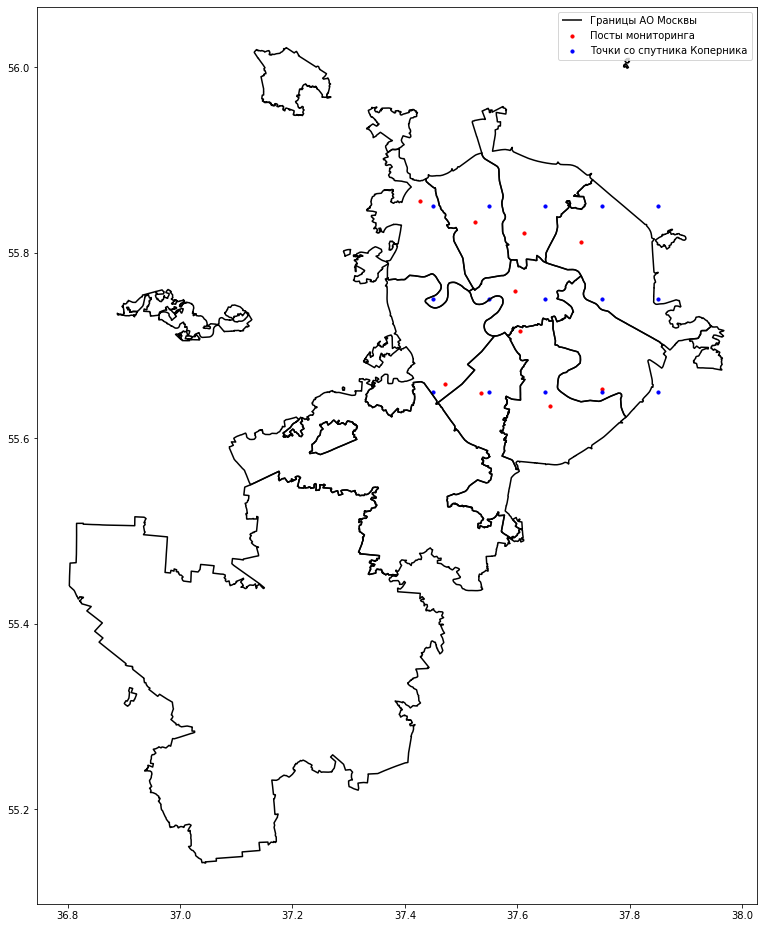

In [27]:
fig, ax = plt.subplots()

ao.boundary.plot(ax=ax, color='black', edgecolor='black')
#mo.boundary.plot(ax=ax, color='black', edgecolor='grey')
posts.plot(ax=ax, marker='o', color='red', markersize=10, aspect=1.65)
cpr_pnts.plot(ax=ax, marker='o', color='blue', markersize=10, aspect=1.65)

ax.legend(['Границы АО Москвы', 'Посты мониторинга', 'Точки со спутника Коперника'])
set_size(10,20)
plt.show()

In [28]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator

In [29]:
exmpl_data.head()

,Дата и время,CO,latitude,longitude,post_name
19210,2020-09-23 19:00:00,2.4,55.833222,37.525158,Коптевскии
19211,2020-09-23 19:20:00,2.1,55.833222,37.525158,Коптевскии
19212,2020-09-23 19:40:00,1.9,55.833222,37.525158,Коптевскии
19213,2020-09-23 20:00:00,2.0,55.833222,37.525158,Коптевскии
19214,2020-09-23 20:20:00,2.1,55.833222,37.525158,Коптевскии


In [159]:
points3d = posts = gpd.GeoDataFrame(
                exmpl_data, geometry=gpd.points_from_xy(exmpl_data.longitude, exmpl_data.latitude))

In [160]:
del points3d['latitude'], points3d['longitude']

In [161]:
mask = (points3d['Дата и время'] >= '2020-09-23 20:40:00') & (points3d['Дата и время'] < '2020-09-23 21:00:00')

In [162]:
points3d = points3d[mask==True]

In [163]:
points3d = points3d.reset_index(drop=True)

In [164]:
totalPointsArray = np.zeros([points3d.shape[0],3])
#iteration over the geopandas dataframe
for index, point in points3d.iterrows():
    pointArray = np.array([point.geometry.coords.xy[0][0],point.geometry.coords.xy[1][0],point['CO']])
    totalPointsArray[index] = pointArray
totalPointsArray[:,:]

array([[37.525158 , 55.833222 ,  2.2      ],
       [37.71249  , 55.811801 ,  1.7      ],
       [37.612592 , 55.821154 ,  1.6      ],
       [37.471434 , 55.658163 ,  1.9      ],
       [37.595584 , 55.759354 ,  1.9      ],
       [37.6052377, 55.715698 ,  1.03     ],
       [37.426628 , 55.856324 ,  1.3      ],
       [37.535874 , 55.649412 ,  0.6      ],
       [37.658684 , 55.635129 ,  3.66     ],
       [37.751502 , 55.652695 ,  2.       ]])

In [165]:
#triangulation function
triFn = Triangulation(totalPointsArray[:,0],totalPointsArray[:,1])
#linear triangule interpolator funtion
linTriFn = LinearTriInterpolator(triFn,totalPointsArray[:,2])

In [166]:
linTriFn

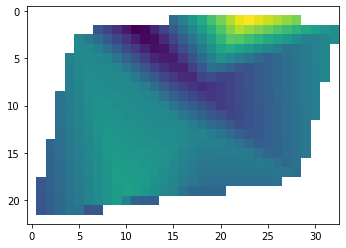

In [174]:
#define raster resolution in (m)
rasterRes = 0.01

xCoords = np.arange(totalPointsArray[:,0].min(), totalPointsArray[:,0].max(), rasterRes)
yCoords = np.arange(totalPointsArray[:,1].min(), totalPointsArray[:,1].max(), rasterRes)
zCoords = np.zeros([yCoords.shape[0],xCoords.shape[0]])

#loop among each cell in the raster extension
for indexX, x in np.ndenumerate(xCoords):
    for indexY, y in np.ndenumerate(yCoords):
        x = np.round(x, 6)
        y = np.round(y, 6)
        
        tempZ = linTriFn(x,y)
        #filtering masked values
        if tempZ == tempZ:
            zCoords[indexY,indexX]=tempZ
        else:
            zCoords[indexY,indexX]=np.nan

#preliminary representation of the interpolated values
plt.imshow(zCoords)

In [175]:
import rasterio
from rasterio.transform import Affine
transform = Affine.translation(xCoords[0] - rasterRes/2, yCoords[0] - rasterRes/2) * Affine.scale(rasterRes, rasterRes)
transform
Affine(2.0, 0.0, 623621.3579761666,
       0.0, 2.0, 8359156.448053772)
#get crs as wkt
from rasterio.crs import CRS
rasterCrs = CRS.from_epsg(32718)
rasterCrs.data
{'init': 'epsg:32718'}
#definition, register and close of interpolated raster
triInterpRaster = rasterio.open('./rst/triangleInterpolation.tif',
                                'w',
                                driver='GTiff',
                                height=zCoords.shape[0],
                                width=zCoords.shape[1],
                                count=1,
                                dtype=zCoords.dtype,
                                #crs='+proj=latlong',
                                crs={'init': 'epsg:32718'},
                                transform=transform,
                                )
triInterpRaster.write(zCoords,1)
triInterpRaster.close()

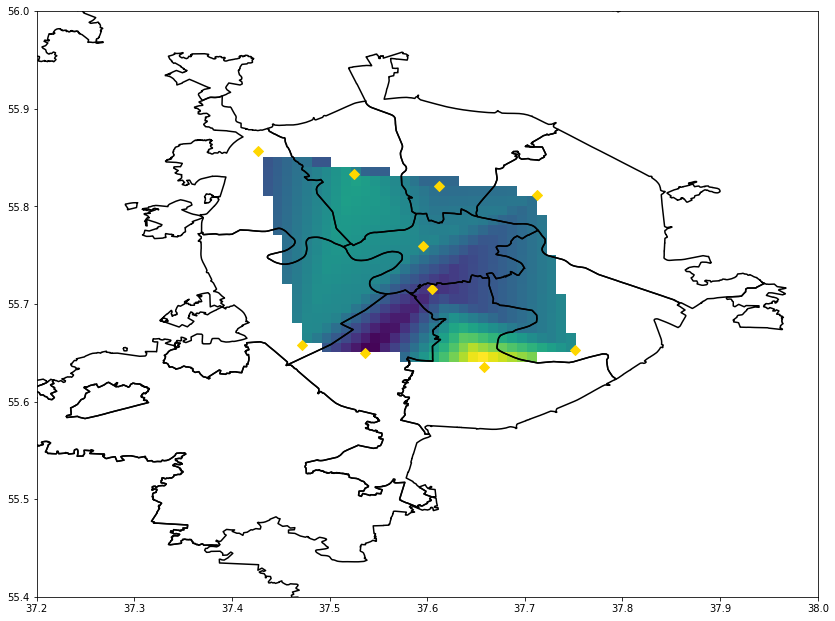

In [176]:
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(14,26))
ax.set_xlim(37.2,38.0)
ax.set_ylim(55.4,56.0)
#ax.set_ylim(8359400,8359800)
src = rasterio.open("./rst/triangleInterpolation.tif")
ao.boundary.plot(ax=ax, color='black', edgecolor='black', aspect=2.25)

points3d.plot(ax=ax, marker='D',markersize=50, color='gold', aspect=2.25)

show(src)
#set_size(10,120,ax=ax)
plt.show()

In [178]:
zCoords.shape

(23, 33)

In [173]:
with open('test.npy', 'wb') as f:
    np.save(f, zCoords)